# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 4**

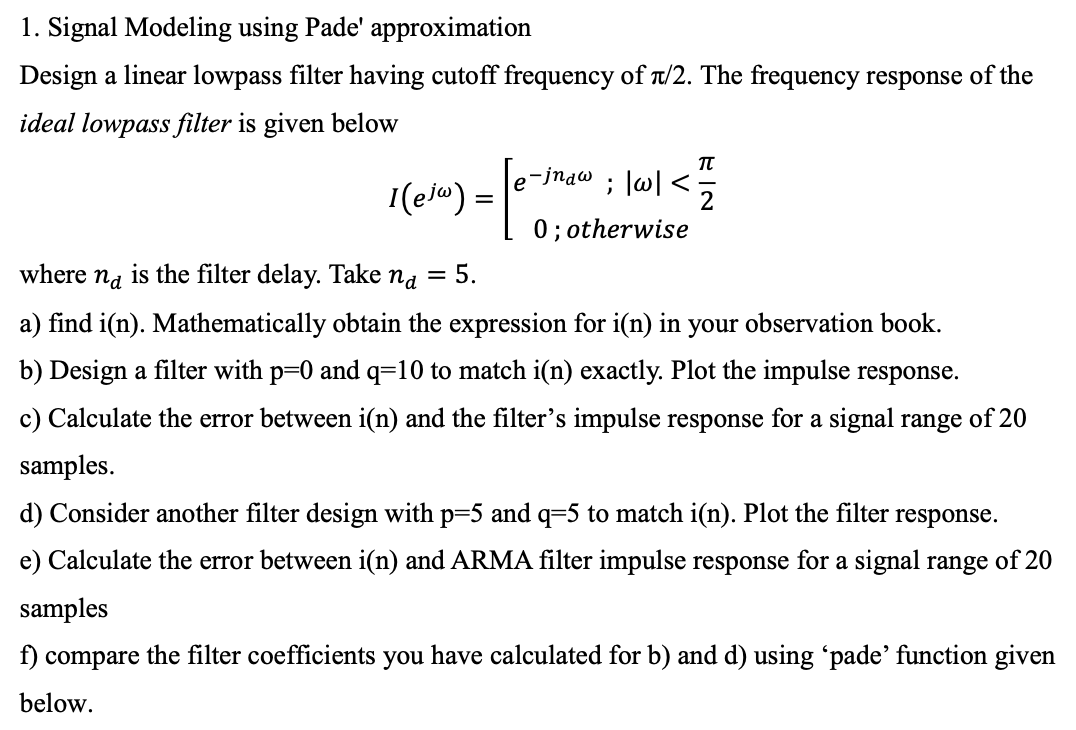

# *Python Code- Part (a),(b) & (c):*

In [17]:
#import libraries
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import signal

<ipython-input-18-82ddc72f06bc>:8: RuntimeWarning: invalid value encountered in double_scalars
  x[temp] = (np.sin(((temp + 1) - nd) * np.pi / 2)) / ((temp + 1) - nd)



Numerator coefficients: 

[[-6.12323400e-17]
 [-3.33333333e-01]
 [ 6.12323400e-17]
 [ 1.00000000e+00]
 [ 5.00000000e-01]
 [ 1.00000000e+00]
 [ 6.12323400e-17]
 [-3.33333333e-01]
 [-6.12323400e-17]
 [ 2.00000000e-01]
 [ 6.12323400e-17]]

Denominator Coefficients: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Transfer function: 

TransferFunctionDiscrete(
array([[-6.12323400e-17],
       [-3.33333333e-01],
       [ 6.12323400e-17],
       [ 1.00000000e+00],
       [ 5.00000000e-01],
       [ 1.00000000e+00],
       [ 6.12323400e-17],
       [-3.33333333e-01],
       [-6.12323400e-17],
       [ 2.00000000e-01],
       [ 6.12323400e-17]]),
array([1.]),
dt: 0.1
)

Error:

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.42857143e-01
 -6.12323400e-17  1.11111111e-01  6.12323400e-17 -9.09090909e-02
 -6.12323400e-17  7.69230769e-02  6.12323400e-17 -6.66666667e-02]


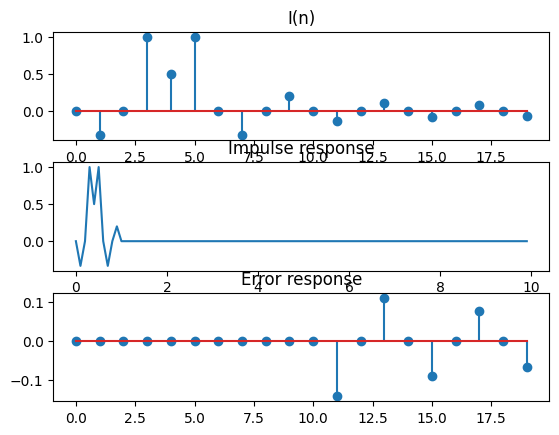

In [18]:
#for p=0 and q=10
q = 10
n = range(20)
nd = 5
temp = 0
x = np.zeros(len(n))
for temp in n:
  x[temp] = (np.sin(((temp + 1) - nd) * np.pi / 2)) / ((temp + 1) - nd)

x[4] = 0.5

#plotting
plt.subplot(3, 1, 1)
plt.title('I(n)')
plt.stem(n, x)
x = x[:, np.newaxis]
b = x[0:11]
print("\nNumerator coefficients: \n")
print(b)
a = np.zeros(len(b))
a[0] = 1
print("\nDenominator Coefficients: \n")
print(a)
# Transferring the obtained coefficients to a transfer function
system = signal.TransferFunction(b, 1, dt=0.1)
# Printing the system representation
print("Transfer function: \n")
print(system)
system1 = signal.dlti(b, a)
# Computing the impulse response
t, h = signal.dimpulse(system)
h = h[0].flatten()
h = h[0:100]
# Plotting the impulse response
plt.subplot(3, 1, 2)
plt.title('Impulse response')
plt.plot(t, h)
# Calculating the error
e = x.flatten() - h[0:20]
# Displaying the error
print("\nError:\n")
print(e)
# Plotting the error
plt.subplot(3, 1, 3)
plt.title('Error response')
plt.stem(n, e)
plt.show()

# *Python Code- Part (d),(e) & (f):*

<ipython-input-19-c4119a8e0444>:9: RuntimeWarning: invalid value encountered in double_scalars
  x[temp] = (np.sin(((temp + 1) - nd) * np.pi / 2)) / ((temp + 1) - nd)



Denominator Coeffecients

[ 1.00000000e+00  5.71205034e-16 -2.64705882e+00 -1.10294118e+00
 -8.82352941e-01  6.61764706e-01]

Numerator Coeffecients

[ 0.00000000e+00 -6.12323400e-17 -3.33333333e-01  3.29162678e-17
  1.88235294e+00  8.67647059e-01 -1.35294118e+00]

Transfer function

TransferFunctionDiscrete(
array([-3.33333333e-01,  3.29162678e-17,  1.88235294e+00,  8.67647059e-01,
       -1.35294118e+00]),
array([ 1.00000000e+00,  5.71205034e-16, -2.64705882e+00, -1.10294118e+00,
       -8.82352941e-01,  6.61764706e-01]),
dt: 0.1
)
[-3.33333333e-01  2.23317946e-16  1.00000000e+00  5.00000000e-01
  1.00000000e+00  2.64705882e+00  4.08088235e+00  7.88927336e+00
  1.42733564e+01  2.70582193e+01  4.83328669e+01  9.16279102e+01
  1.65156861e+02  3.10282073e+02  5.62980595e+02  1.05235637e+03
  1.91755615e+03  3.57106702e+03  6.52798496e+03]

Error:

[-6.12323400e-17  0.00000000e+00 -1.62085606e-16  1.11022302e-16
 -4.44089210e-16  0.00000000e+00 -2.64705882e+00 -4.41421569e+00
 -7.889273

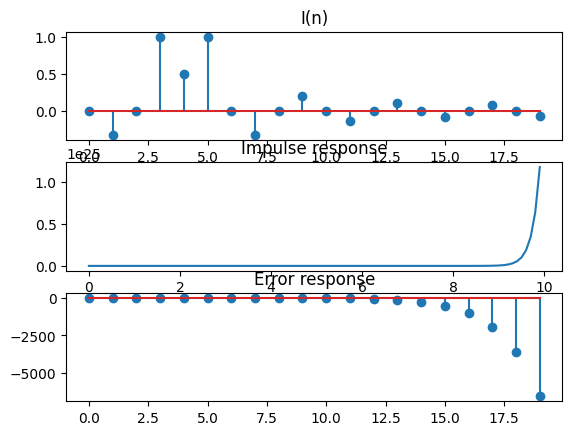

In [19]:
#for p=5 and q=5
p = 5
q = 5
n = range(20)
nd = 5
temp = 0
x = np.zeros(len(n))
for temp in n:
  x[temp] = (np.sin(((temp + 1) - nd) * np.pi / 2)) / ((temp + 1) - nd)

x[4] = 0.5
plt.subplot(3, 1, 1)
plt.title('I(n)')
plt.stem(n, x)
x = x[:, np.newaxis]
if p + q >= len(x):
  raise ValueError("Model order too large")

X = []
N = len(x) + 2 * p - 1
xpad = np.concatenate((np.zeros((p, 1)), x, np.zeros((p, 1))))
for i in range(1, p + 2):
  X.append(xpad[p - i + 1 : N - i + 1])

X = np.column_stack(X)
Xq = X[q + 1 : q + p + 1, 1:p + 1]
Xqq = X[q + 1 : p + q + 1, 0]
Xqq = np.reshape(Xqq, (len(Xqq), 1))
a = np.matmul(np.linalg.pinv(Xqq), Xq)
a = np.array(a)
a = np.append(1, a)
print("\nDenominator Coeffecients\n")
print(a)
b = np.matmul(X[0:q + 1, 0:p + 1], a)
b = np.append(0, b)
print("\nNumerator Coeffecients\n")
print(b)

# Transferring the obtained coefficients to a transfer function
system = signal.TransferFunction(b, a, dt=0.1)
# Printing the system representation
print("\nTransfer function\n")
print(system)
system1 = signal.dlti(b, a)
# Computing the impulse response
t, h = signal.dimpulse(system)
h = h[0].flatten()
# Plotting the impulse response
plt.subplot(3, 1, 2)
plt.title('Impulse response')
plt.plot(t, h)
print(h[1:20])
# Calculating the error
e = x.flatten() - h[0:20]
# Displaying the error
print("\nError:\n")
print(e)
# Plotting the error
plt.subplot(3, 1, 3)
plt.title('Error response')
plt.stem(n, e)
plt.show()